In [2]:
from urllib.parse import urlparse
import unicodedata
import re
import os
import requests
from bs4 import BeautifulSoup
import json

In [3]:
# Leer el archivo JSON guardado
Nombre_Archivo = f"./resultados/res_unicos_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    all_hrefs = json.load(file)
all_hrefs

['https://es.wikipedia.org/wiki/Ley',
 'https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las',
 'https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica',
 'https://www.interpol.int/es/Delitos/Corrupcion',
 'https://dle.rae.es/corrupci%C3%B3n',
 'https://www.unodc.org/newsletter/es/200601/page004.html',
 'https://www.argentina.gob.ar/servicio/denunciar-un-hecho-de-corrupcion',
 'https://www.fiscales.gob.ar/corrupcion/',
 'https://www.un.org/es/observances/anti-corruption-day',
 'https://www.argentina.gob.ar/sites/default/files/nuevos_enfoques_sobre_la_corrupcion_perspectiva_historica_federal_y_multidimensional_0.pdf',
 'https://www.youtube.com/watch?v=UaaagN5Umsw',
 'http://servicios.infoleg.gob.ar/infolegInternet/anexos/40000-44999/41466/norma.htm',
 'https://www.cij.gov.ar/causas-de-corrupcion.html',
 'https://www.oas.org/es/temas/corrupcion.asp',
 'https://denuncia

In [4]:
len(all_hrefs)

597

In [5]:
output_dir = "all_pages"
os.makedirs(output_dir, exist_ok=True)

In [6]:
def nombre_desde_url(url, ext=".html"):
    """
    Convierte una URL en un nombre de archivo tipo:
    https://es.wikipedia.org/wiki/Ley
    -> es_wikipedia_org_wiki_Ley.html (o .pdf si ext=".pdf")
    """
    parsed = urlparse(url)
    
    # dominio: es.wikipedia.org -> es_wikipedia_org
    dominio = parsed.netloc.replace(".", "_")
    
    # path: /wiki/Ley -> wiki_Ley
    path = parsed.path.strip("/")          # "wiki/Ley"
    path = path.replace("/", "_")          # "wiki_Ley"
    
    if path:
        base = f"{dominio}_{path}"
    else:
        base = dominio

    # Dejar solo letras, números y guiones bajos
    base = re.sub(r"[^A-Za-z0-9_]", "_", base)
    base = re.sub(r"_+", "_", base).strip("_")
    
    # asegurar que la extensión empiece con punto
    if not ext.startswith("."):
        ext = "." + ext
    
    return base + ext

In [ ]:
from pathlib import Path

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/128.0.0.0 Safari/537.36"
}

directorio = Path("./all_pages")
directorio_clean = Path("./all_pages_clean")
timeout_urls = []
errors = []

for i, url in enumerate(all_hrefs):
    try:
        print(f"⬇Descargando: {url}")
        response = requests.get(url, headers=headers, timeout=20)
        response.raise_for_status()  # Verificar que la solicitud fue exitosa

        content_type = response.headers.get("Content-Type", "").lower()

        if "application/pdf" in content_type or url.lower().endswith(".pdf"):
            # PDF
            ext = "pdf"
        else:
            # HTML
            ext = "html"
        old_name = nombre_desde_url(url, ext=".")
        old_path = directorio / (old_name + ext)
        old_path_clean = directorio_clean / (old_name + "txt")

        if ext == "pdf":
            # ✅ Nombre del PDF basado en la URL
            new_name = f"lack_{i:04d}.{ext}"
                    
            output_file = directorio / new_name
            with open(output_file, "wb") as f:
                f.write(response.content)
                        
            print(f"Guardado PDF: {new_name} ({url})")
        else:
            # HTML
            new_name = f"lack_{i:04d}.{ext}"
            page_content = response.text
                        
            output_file = directorio / new_name
            with open(output_file, "w", encoding="utf-8") as f:
                f.write(page_content)
                        
            print(f"Guardado: {new_name} ({url})")
    except requests.exceptions.Timeout as e:
        print(f"⏰ Timeout en {url}: {e}")
        timeout_urls.append((i, url))
    except requests.exceptions.HTTPError as e:
        print(f"⚠️ Error HTTP en {url}: {e}")
        errors.append((i, url))
    except Exception as e:
        print(f"❌ Error general en {url}: {e}")
        errors.append((i, url))
    
print("Descarga completada.")

⬇Descargando: https://es.wikipedia.org/wiki/Ley
Guardado: es_wikipedia_org_wiki_Ley.html (https://es.wikipedia.org/wiki/Ley)
⬇Descargando: https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
⚠️ Error HTTP en https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las: 403 Client Error: Forbidden for url: https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
⬇Descargando: https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
Guardado: es_wikipedia_org_wiki_Corrupci_C3_B3n_pol_C3_ADtica.html (https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica)
⬇Descargando: https://www.interpol.int/es/Delitos/Corrupcion
Guardado: www_interpol_int_es_Delit

In [16]:
len(errors[0])

66

In [35]:
dict_urls = {}

In [61]:
url = "https://www.ultimahora.com/corrupcion"
print(nombre_desde_url(url))

www_ultimahora_com_corrupcion.html


In [17]:
for i, j in zip(errors[0], errors[1]):
    print(f"{j}: {i}")

1: https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
4: https://dle.rae.es/corrupci%C3%B3n
28: https://www.ohchr.org/es/good-governance/corruption-and-human-rights
33: https://dpej.rae.es/lema/corrupci%C3%B3n
37: https://www.coe.int/es/web/portal/-/anti-corruption-day-states-must-take-determined-action-to-protect-democracy-against-corruption-
43: https://publications.iadb.org/publications/spanish/document/Corrupci%C3%B3n-normal-y-corrupci%C3%B3n-sist%C3%A9mica.pdf
59: https://www.transparency.org/es/press/cpi2023-corruption-perceptions-index-weakening-justice-systems-leave-corruption-unchecked
60: https://www.unir.net/revista/derecho/que-es-corrupcion/
68: https://www.state.gov/translations/spanish/combatiendo-la-corrupcion-global-y-los-abusos-de-los-derechos-humanos/
70: https://www.lavoz.com.ar/servicios/dia-internacional-contra-la-corrupcion-por-que-se-celebra-hoy-9

In [ ]:
dict_urls['https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0718-33992016000100011'] = 'www_scielo_cl_scielo_php_pid_S0718_33992016000100011.pdf'
dict_urls["https://publications.iadb.org/es/publicacion/13577/metodologia-para-el-diagnostico-prevencion-y-control-de-la-corrupcion-en"] = "publications_iadb_org_es_publicacion_13577_metodologia_para_el_diagnostico_prevencion_y_control_de_la_corrupcion_en.pdf"
dict_urls["https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0718-92732018000300009"] = "www_scielo_cl_scielo_php_pid=S0718-92732018000300009.pdf"
dict_urls["https://www.scielo.cl/scielo.php?pid=S0718-92732018000300089&script=sci_abstract"] = "www_scielo_cl_scielo_php_pid_S0718_92732018000300089.pdf"
dict_urls["https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0718-33992018000100104"] = "www_scielo_cl_scielo_php_pid_S0718_33992018000100104.pdf"

# Tamanos

In [8]:
import matplotlib.pyplot as plt

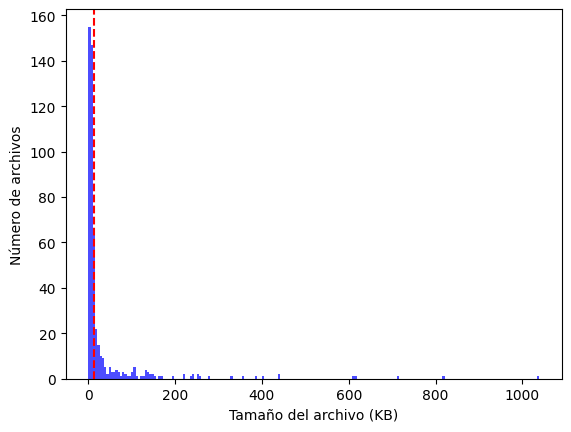

In [9]:
limit = 13 # KB
sizes = [os.path.getsize(os.path.join(output_dir+'_clean', f))/1024 for f in os.listdir(output_dir+'_clean')]
plt.hist(sizes, bins=200, color='blue', alpha=0.7)
plt.xlabel("Tamaño del archivo (KB)")
plt.ylabel("Número de archivos")
plt.axvline(x=limit, color='r', linestyle='--', label=f'Límite {limit}KB')
plt.show()

In [15]:
duplicates = set()
dict_processed = {}
for url in all_hrefs:
    dict_processed[nombre_desde_url(url)] = 0
for i, url in enumerate(all_hrefs):
    #print(i, nombre_desde_url(url))
    dict_processed[nombre_desde_url(url)] += 1
    if dict_processed[nombre_desde_url(url)] > 1:
        duplicates.add(url)

print(len(duplicates))


35


In [23]:
from pathlib import Path

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/128.0.0.0 Safari/537.36"
}

directorio = Path("./all_pages")
directorio_clean = Path("./all_pages_clean")
timeout_urls = []
errors = []

for i, url in enumerate(all_hrefs):
    try:
        print(f"⬇Descargando: {url}")
        response = requests.get(url, headers=headers, timeout=20)
        response.raise_for_status()  # Verificar que la solicitud fue exitosa

        content_type = response.headers.get("Content-Type", "").lower()

        if "application/pdf" in content_type or url.lower().endswith(".pdf"):
            # PDF
            ext = "pdf"
        else:
            # HTML
            ext = "html"
        old_name = nombre_desde_url(url, ext=".")
        old_path = directorio / (old_name + ext)
        old_path_clean = directorio_clean / (old_name + "txt")

        if url not in duplicates:
            if old_path.exists():
                new_name = f"{i:04d}.{ext}"
                new_path = directorio / new_name
                if new_path.exists():
                    print(f"Archivo ya existe: {new_name}, saltando...")
                else:
                    old_path.rename(new_path)
            else:
                if ext == "pdf":
                    # ✅ Nombre del PDF basado en la URL
                    new_name = f"{i:04d}.{ext}"
                    
                    output_file = directorio / new_name
                    with open(output_file, "wb") as f:
                        f.write(response.content)
                        
                    print(f"Guardado PDF: {new_name} ({url})")
                else:
                    # HTML
                    new_name = f"{i:04d}.{ext}"
                    page_content = response.text
                        
                    output_file = directorio / new_name
                    with open(output_file, "w", encoding="utf-8") as f:
                        f.write(page_content)
                        
                    print(f"Guardado: {new_name} ({url})")
                    
            if old_path_clean.exists():
                new_name = f"{i:04d}.txt"
                new_path = directorio_clean / new_name
                if new_path.exists():
                    print(f"Archivo ya existe: {new_name}, saltando...")
                else:
                    old_path_clean.rename(new_path)
        else:
            if ext == "pdf":
                # ✅ Nombre del PDF basado en la URL
                new_name = f"lack_{i:04d}.{ext}"
                    
                output_file = directorio / new_name
                with open(output_file, "wb") as f:
                    f.write(response.content)
                        
                print(f"Guardado PDF: {new_name} ({url})")
            else:
                # HTML
                new_name = f"lack_{i:04d}.{ext}"
                page_content = response.text
                        
                output_file = directorio / new_name
                with open(output_file, "w", encoding="utf-8") as f:
                    f.write(page_content)
                        
                print(f"Guardado: {new_name} ({url})")
    except requests.exceptions.Timeout as e:
        print(f"⏰ Timeout en {url}: {e}")
        timeout_urls.append((i, url))
    except requests.exceptions.HTTPError as e:
        print(f"⚠️ Error HTTP en {url}: {e}")
        errors.append((i, url))
    except Exception as e:
        print(f"❌ Error general en {url}: {e}")
        errors.append((i, url))
    
print("Descarga completada.")


⬇Descargando: https://es.wikipedia.org/wiki/Ley
Guardado: 0000.html (https://es.wikipedia.org/wiki/Ley)
⬇Descargando: https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
⚠️ Error HTTP en https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las: 403 Client Error: Forbidden for url: https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
⬇Descargando: https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
Guardado: 0002.html (https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica)
⬇Descargando: https://www.interpol.int/es/Delitos/Corrupcion
Guardado: 0003.html (https://www.interpol.int/es/Delitos/Corrupcion)
⬇Descargando: https://dle.rae.es/c

In [25]:
for i in timeout_urls:
    print(f"{i[0]}: {i[1]}")

89: https://www.imf.org/external/pubs/ft/issues/issues21/esl/issue21s.pdf
127: https://www.imf.org/es/Blogs/Articles/2019/04/04/blog-fm-ch2-tackling-corruption-in-government
137: https://www.mpfn.gob.pe/fiscalias_anticorrupcion/prevencion/
140: https://www.iberdrola.com/gobierno-corporativo/sistema-gobernanza-sostenibilidad/politicas-gobierno-corporativo/politica-contra-corrupcion-fraude
149: https://www.imf.org/external/pubs/ft/fandd/spa/2000/06/pdf/klitgaar.pdf
226: https://www.fiscalia.gov.co/colombia/wp-content/uploads/Tomo-VIII.pdf
235: http://www.gobiernobogota.gov.co/atencion-y-servicios-a-la-ciudadania/tramites-opas-otras-consultas/denuncia-actos-corrupcion
248: https://www.fiscalia.gov.co/colombia/wp-content/uploads/Tomo-VII.pdf
289: https://cgrfiles.cgr.go.cr/publico/docsweb/documentos/leyes-reglamentos/ley-contra-corrupcion-anotada-concordada.pdf
349: https://dspace.ups.edu.ec/bitstream/123456789/23564/1/EXTRACTIVISMOS%20Y%20CORRUPCIO%CC%81N.pdf
374: https://www.mp.gob.gt/no

In [26]:
for i in errors:
    print(f"{i[0]}: {i[1]}")

1: https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
4: https://dle.rae.es/corrupci%C3%B3n
28: https://www.ohchr.org/es/good-governance/corruption-and-human-rights
33: https://dpej.rae.es/lema/corrupci%C3%B3n
37: https://www.coe.int/es/web/portal/-/anti-corruption-day-states-must-take-determined-action-to-protect-democracy-against-corruption-
43: https://publications.iadb.org/publications/spanish/document/Corrupci%C3%B3n-normal-y-corrupci%C3%B3n-sist%C3%A9mica.pdf
59: https://www.transparency.org/es/press/cpi2023-corruption-perceptions-index-weakening-justice-systems-leave-corruption-unchecked
60: https://www.unir.net/revista/derecho/que-es-corrupcion/
68: https://www.state.gov/translations/spanish/combatiendo-la-corrupcion-global-y-los-abusos-de-los-derechos-humanos/
70: https://www.lavoz.com.ar/servicios/dia-internacional-contra-la-corrupcion-por-que-se-celebra-hoy-9

In [28]:
from pathlib import Path

carpeta = Path("all_pages_clean")  # cámbialo por la ruta correcta

for path in carpeta.glob("lack_*.*"):
    # quitar solo la primera aparición de "lack_"
    nuevo_nombre = path.name.replace("lack_", "", 1)
    nuevo_path = path.with_name(nuevo_nombre)
    print(f"{path.name} -> {nuevo_path.name}")
    path.rename(nuevo_path)


lack_0167.txt -> 0167.txt
lack_0370.txt -> 0370.txt
lack_0111.txt -> 0111.txt
lack_0571.txt -> 0571.txt
lack_0510.txt -> 0510.txt
lack_0122.txt -> 0122.txt
lack_0286.txt -> 0286.txt
lack_0490.txt -> 0490.txt
lack_0583.txt -> 0583.txt
lack_0078.txt -> 0078.txt
lack_0338.txt -> 0338.txt
lack_0107.txt -> 0107.txt
lack_0457.txt -> 0457.txt
lack_0468.txt -> 0468.txt
lack_0276.txt -> 0276.txt
lack_0531.txt -> 0531.txt
lack_0360.txt -> 0360.txt
lack_0019.txt -> 0019.txt
lack_0340.txt -> 0340.txt
lack_0482.txt -> 0482.txt
lack_0306.txt -> 0306.txt
lack_0556.txt -> 0556.txt
lack_0346.txt -> 0346.txt
lack_0358.txt -> 0358.txt
lack_0073.txt -> 0073.txt
lack_0328.txt -> 0328.txt
lack_0450.txt -> 0450.txt
lack_0393.txt -> 0393.txt
lack_0056.txt -> 0056.txt
lack_0489.txt -> 0489.txt
lack_0015.txt -> 0015.txt
